# TensorFlow 指南
https://tensorflow.google.cn/guide/
    
* 高阶 API
    * Keras，用于构建和训练深度学习模型的 TensorFlow 高阶 API。
    * Eager Execution，一个以命令方式编写 TensorFlow 代码的 API，就像使用 NumPy 一样。
    * Estimator，一个高阶 API，可以提供已准备好执行大规模训练和生产的完全打包的模型。
    * 导入数据，简单的输入管道，用于将您的数据导入 TensorFlow 程序。

* Estimator
    * Estimator，了解如何将 Estimator 用于机器学习。
    * 预创建的 Estimator，预创建的 Estimator 的基础知识。
    * 检查点，保存训练进度并从您停下的地方继续。
    * 特征列，在不对模型做出更改的情况下处理各种类型的输入数据。
    * Estimator 的数据集，使用 tf.data 输入数据。
    * 创建自定义 Estimator，编写自己的 Estimator。

## 编程堆栈
在详细了解程序本身之前，我们先来了解编程环境。如下图所示，TensorFlow 提供一个包含多个 API 层的编程堆栈：

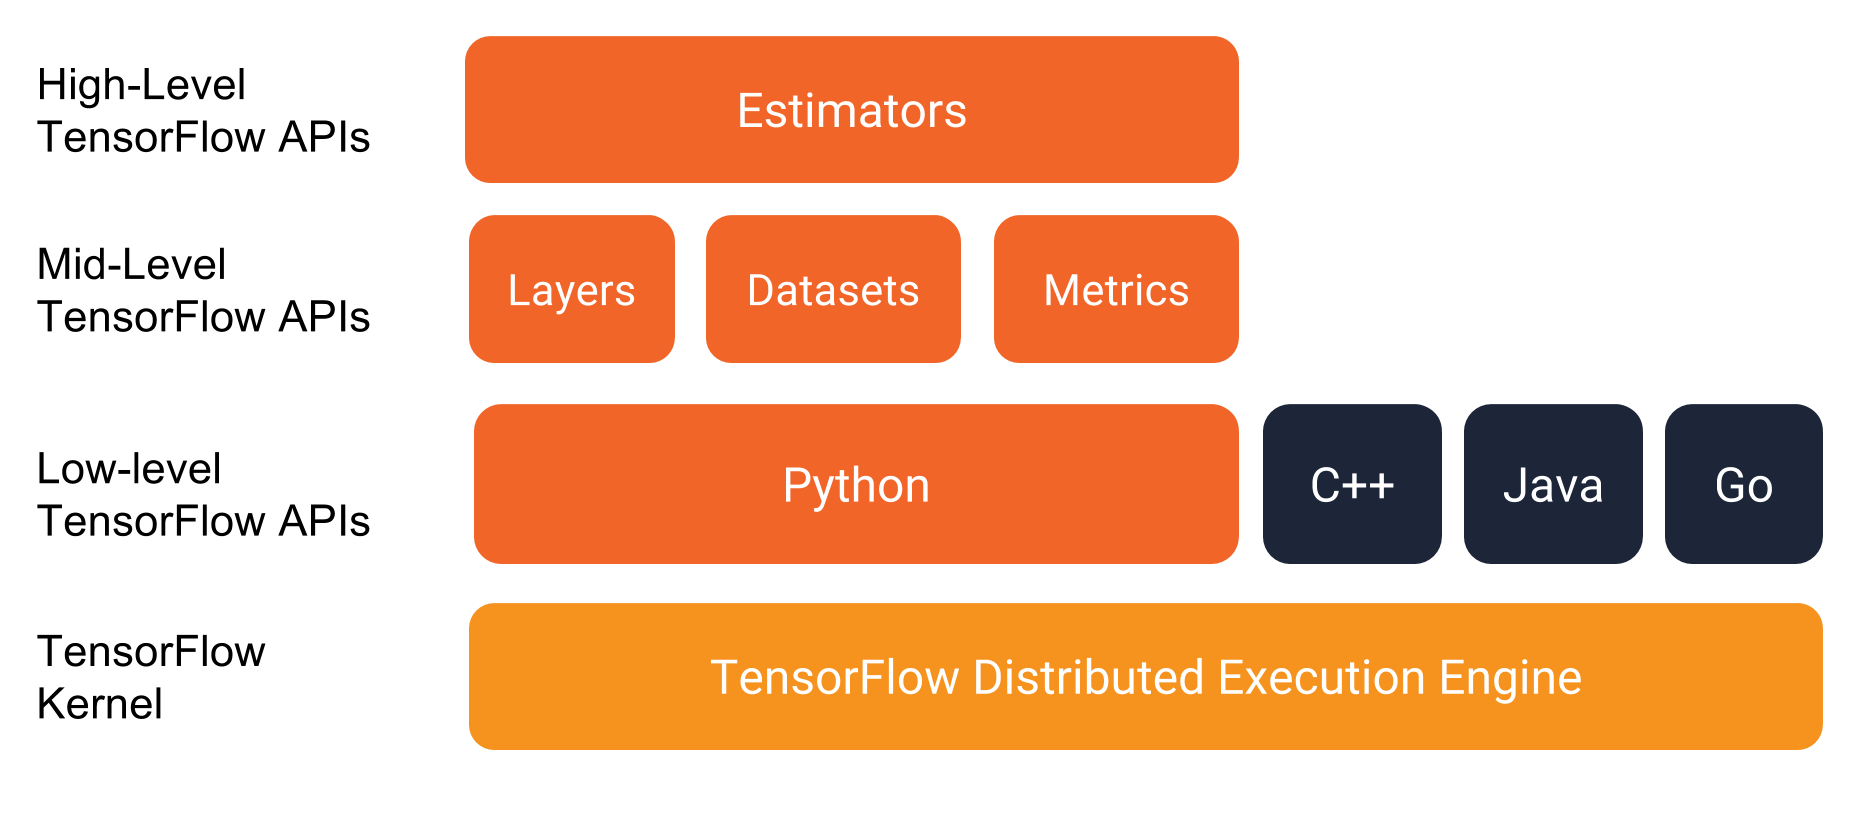

我们强烈建议使用下列 API 编写 TensorFlow 程序：

* Estimator：代表一个完整的模型。Estimator API 提供一些方法来训练模型、判断模型的准确率并生成预测。
* Estimator 的数据集：构建数据输入管道。Dataset API 提供一些方法来加载和操作数据，并将数据馈送到模型中。Dataset API 与 Estimator API 合作无间。

# Estimator
一个高阶 API，可以提供已准备好执行大规模训练和生产的完全打包的模型。

## Estimator简介
https://tensorflow.google.cn/guide/estimators

本文档介绍了 Estimator - 一种可极大地简化机器学习编程的高阶 TensorFlow API。Estimator 会封装下列操作：

* 训练
* 评估
* 预测
* 导出以供使用
您可以使用我们提供的预创建的 Estimator，也可以编写自定义 Estimator。所有 Estimator（无论是预创建的还是自定义）都是基于 `tf.estimator.Estimator` 类的类。

注意：TensorFlow 还包含一个已弃用的 Estimator 类 `tf.contrib.learn.Estimator`，您不应该使用此类。

Estimator 是 TensorFlow 对完整模型的高级表示。它会处理初始化、日志记录、保存和恢复等细节部分，并具有很多其他功能，以便您可以专注于模型。

Estimator 是从 tf.estimator.Estimator 衍生而来的任何类。TensorFlow 提供一组预创建的 [Estimator](https://tensorflow.google.cn/api_docs/python/tf/estimator)（例如 LinearRegressor）来实现常见的机器学习算法。除此之外，您可以编写自定义 Estimator。我们建议在刚开始使用 TensorFlow 时使用预创建的 Estimator。

### Estimator 的优势
Estimator 具有下列优势：

* 您可以在本地主机上或分布式多服务器环境中运行基于 Estimator 的模型，而无需更改模型。此外，您可以在 CPU、GPU 或 TPU 上运行基于 Estimator 的模型，而无需重新编码模型。
* Estimator 简化了在模型开发者之间共享实现的过程。
* 您可以使用高级直观代码开发先进的模型。简言之，采用 Estimator 创建模型通常比采用低阶 TensorFlow API 更简单。
* Estimator 本身在 tf.layers 之上构建而成，可以简化自定义过程。
* Estimator 会为您构建图。
* Estimator 提供安全的分布式训练循环，可以控制如何以及何时：
    * 构建图
    * 初始化变量
    * 开始排队
    * 处理异常
    * 创建检查点文件并从故障中恢复
* 保存 TensorBoard 的摘要

使用 Estimator 编写应用时，您必须__将数据输入管道从模型中分离出来__。这种分离简化了不同数据集的实验流程。



### 推荐的工作流程
我们推荐以下工作流程：

* 假设存在合适的预创建的 Estimator，使用它构建第一个模型并使用其结果确定基准。
* 使用此预创建的 Estimator 构建和测试整体管道，包括数据的完整性和可靠性。
* 如果存在其他合适的预创建的 Estimator，则运行实验来确定哪个预创建的 Estimator 效果最好。
* 可以通过构建自定义 Estimator 进一步改进模型。

### TensorFlow 提供的预创建的 Estimator
https://tensorflow.google.cn/api_docs/python/tf/estimator

* tf.estimator.DNNClassifier：适用于执行多类别分类的深度模型。
* tf.estimator.DNNLinearCombinedClassifier：适用于宽度和深度模型。
* tf.estimator.LinearClassifier：适用于基于线性模型的分类器。

## 预创建的 Estimator
借助预创建的 Estimator，您能够在比基本 TensorFlow API 高级很多的概念层面上进行操作。

由于 Estimator 会为您处理所有“管道工作”，因此您不必再为创建计算图或会话而操心。也就是说，预创建的 Estimator 会为您创建和管理 Graph 和 Session 对象。

此外，借助预创建的 Estimator，您只需稍微更改下代码，就可以尝试不同的模型架构。例如，DNNClassifier 是一个预创建的 Estimator 类，它根据密集的前馈神经网络训练分类模型。

### 预创建的 Estimator 程序的结构
依赖预创建的 Estimator 的 TensorFlow 程序通常包含下列四个步骤：

#### 创建输入函数。 
您必须创建输入函数来提供用于训练、评估和预测的数据。

输入函数是返回 tf.data.Dataset 对象的函数，此对象会输出下列含有两个元素的元组：

* features - Python 字典，其中：
    * 每个键都是特征的名称。
    * 每个值都是包含此特征所有值的数组。
* label - 包含每个样本的标签值的数组。

In [ ]:
def input_fn(dataset):
   ...  # manipulate dataset, extracting the feature dict and the label
   return feature_dict, label

#### 定义特征列。 
每个 tf.feature_column 都标识了特征名称、特征类型和任何输入预处理操作。例如，以下代码段创建了三个存储整数或浮点数据的特征列。前两个特征列仅标识了特征的名称和类型。第三个特征列还指定了一个 lambda，该程序将调用此 lambda 来调节原始数据：

In [ ]:
# Define three numeric feature columns.
population = tf.feature_column.numeric_column('population')
crime_rate = tf.feature_column.numeric_column('crime_rate')
median_education = tf.feature_column.numeric_column('median_education',
                    normalizer_fn=lambda x: x - global_education_mean)

#### 实例化相关的预创建的 Estimator。
例如，下面是对名为 LinearClassifier 的预创建 Estimator 进行实例化的示例代码：

In [ ]:
# Instantiate an estimator, passing the feature columns.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[population, crime_rate, median_education],
    )

#### 调用训练、评估或推理方法。
例如，所有 Estimator 都提供训练模型的 train 方法。

In [ ]:
# my_training_set is the function created in Step 1
estimator.train(input_fn=my_training_set, steps=2000)

### 从 Keras 模型创建 Estimator
您可以将现有的 Keras 模型转换为 Estimator。这样做之后，Keras 模型就可以利用 Estimator 的优势，例如分布式训练。调用 tf.keras.estimator.model_to_estimator，如下例所示：

In [ ]:
# Instantiate a Keras inception v3 model.
keras_inception_v3 = tf.keras.applications.inception_v3.InceptionV3(weights=None)
# Compile model with the optimizer, loss, and metrics you'd like to train with.
keras_inception_v3.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                          loss='categorical_crossentropy',
                          metric='accuracy')
# Create an Estimator from the compiled Keras model. Note the initial model
# state of the keras model is preserved in the created Estimator.
est_inception_v3 = tf.keras.estimator.model_to_estimator(keras_model=keras_inception_v3)

# Treat the derived Estimator as you would with any other Estimator.
# First, recover the input name(s) of Keras model, so we can use them as the
# feature column name(s) of the Estimator input function:
keras_inception_v3.input_names  # print out: ['input_1']
# Once we have the input name(s), we can create the input function, for example,
# for input(s) in the format of numpy ndarray:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"input_1": train_data},
    y=train_labels,
    num_epochs=1,
    shuffle=False)
# To train, we call Estimator's train function:
est_inception_v3.train(input_fn=train_input_fn, steps=2000)

请注意，Keras Estimator 的特征列名称和标签来自经过编译的对应 Keras 模型。例如，上面的 train_input_fn 的输入键名称可以从 keras_inception_v3.input_names 获得；同样，预测的输出名称可以从 keras_inception_v3.output_names 获得。

## 预创建的 Estimator示例1
https://tensorflow.google.cn/guide/premade_estimators

本文档介绍了 TensorFlow 编程环境，并向您展示了如何在 TensorFlow 中解决鸢尾花分类问题。

本文档中介绍的程序是 premade_estimator.py。此程序使用 iris_data.py 获取其训练数据。

### 运行程序
您可以像运行任何 Python 程序一样运行 TensorFlow 程序。例如：

In [2]:
!python premade_estimator.py

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/

I0821 15:24:37.129530 140735529624448 basic_session_run_hooks.py:606] Saving checkpoints for 0 into /var/folders/7j/kgtjln3x2dj2g2v57d5vncyw0000gp/T/tmpb36ib7p0/model.ckpt.
I0821 15:24:37.334531 140735529624448 basic_session_run_hooks.py:262] loss = 135.02603, step = 1
I0821 15:24:37.476341 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 702.771
I0821 15:24:37.476802 140735529624448 basic_session_run_hooks.py:260] loss = 23.025366, step = 101 (0.142 sec)
I0821 15:24:37.573368 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1030.52
I0821 15:24:37.573809 140735529624448 basic_session_run_hooks.py:260] loss = 11.032691, step = 201 (0.097 sec)
I0821 15:24:37.672002 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1013.85
I0821 15:24:37.672456 140735529624448 basic_session_run_hooks.py:260] loss = 9.210818, step = 301 (0.099 sec)
I0821 15:24:37.769164 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1029.26
I0821 15:24:37.769

该程序应该会输出训练日志，然后对测试集进行一些预测。例如，以下输出的第一行显示该模型认为测试集中的第一个样本是山鸢尾的可能性为 99.6％。由于测试集中的第一个样本确实是山鸢尾，因此该模型预测得还比较准确。

### 数据集中的三个样本：
花萼长度|	花萼宽度|	花瓣长度|	花瓣宽度|	品种（标签）
-|-|-|-|-|
5.1|	3.3|	1.7|	0.5|	0（山鸢尾）
5.0|	2.3|	3.3|	1.0|	1（变色鸢尾）
6.4|	2.8|	5.6|	2.2|	2（维吉尼亚鸢尾）

### 创建输入函数

In [ ]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

不过，我们建议使用 TensorFlow 的 Dataset API，它可以解析各种数据。

In [ ]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

### 定义特征列
特征列是一个对象，用于说明模型应该如何使用特征字典中的原始输入数据。在构建 Estimator 模型时，您会向其传递一个特征列的列表，其中包含您希望模型使用的每个特征。tf.feature_column 模块提供很多用于在模型中表示数据的选项。

对于鸢尾花问题，4 个原始特征是数值，因此我们会构建一个特征列的列表，以告知 Estimator 模型将这 4 个特征都表示为 32 位浮点值。因此，创建特征列的代码如下所示：



In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

特征列可能比上述示例复杂得多。我们将在入门指南的后面部分详细介绍特征列。

我们已经介绍了希望模型如何表示原始特征，现在可以构建 Estimator 了。

### 实例化 Estimator

In [ ]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 3 classes.
    n_classes=3)

### 训练、评估和预测

In [ ]:
# Train the Model.
classifier.train(
    input_fn=lambda:iris_data.train_input_fn(train_x, train_y, args.batch_size),
    steps=args.train_steps)

In [ ]:
# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:iris_data.eval_input_fn(test_x, test_y, args.batch_size))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

In [ ]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier.predict(
    input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                            batch_size=args.batch_size))

predict 方法返回一个 Python 可迭代对象，为每个样本生成一个预测结果字典。以下代码输出了一些预测及其概率：

In [ ]:
template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(template.format(iris_data.SPECIES[class_id],
                          100 * probability, expec))

## 检查点
https://tensorflow.google.cn/guide/checkpoints

## 特征列
https://tensorflow.google.cn/guide/feature_columns

## Estimator 的数据集
https://tensorflow.google.cn/guide/datasets_for_estimators

## Estimator示例2

https://tensorflow.google.cn/tutorials/estimators/linear

In [4]:
import tensorflow as tf
import tensorflow.feature_column as fc

import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [5]:
tf.enable_eager_execution()

In [6]:
models_path = '/Users/luoyonggui/Documents/temp/models'
sys.path.append(models_path)

In [7]:
from official.wide_deep import census_dataset
from official.wide_deep import census_main
download_dir = "data_gen/census_data/"
census_dataset.download(download_dir)

W0821 17:14:24.350226 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/Documents/temp/models/official/wide_deep/census_dataset.py:78: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0821 17:14:24.351735 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/Documents/temp/models/official/wide_deep/census_dataset.py:81: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0821 17:14:47.420804 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/Documents/temp/models/official/wide_deep/census_dataset.py:62: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0821 17:14:47.605268 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/Documents/temp/models/official/wide_deep/census_dataset.py:73: The name tf.gfile.Remove is deprecated. Please use tf.io.gfile.remove instead.



In [8]:
train_file = f"{download_dir}adult.data"
test_file = f"{download_dir}adult.test"

In [9]:
census_dataset._CSV_COLUMNS

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

In [10]:
import pandas

train_df = pandas.read_csv(train_file, header = None, names = census_dataset._CSV_COLUMNS)
test_df = pandas.read_csv(test_file, header = None, names = census_dataset._CSV_COLUMNS)

train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 这些列分为两类 - 类别列和连续列：

* 如果某个列的值只能是一个有限集合中的类别之一，则该列称为类别列。例如，婚恋状况（妻子、丈夫、未婚等）或受教育程度（高中、大学等）属于类别列。
* 如果某个列的值可以是连续范围内的任意数值，则该列称为连续列。例如，一个人的资本收益（如 14084 美元）属于连续列。

In [11]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
  label = df[label_key]
  ds = tf.data.Dataset.from_tensor_slices((dict(df),label))

  if shuffle:
    ds = ds.shuffle(10000)

  ds = ds.batch(batch_size).repeat(num_epochs)

  return ds

In [12]:
type(dict(train_df)['age'])

pandas.core.series.Series

In [13]:
ds = easy_input_function(train_df, label_key='income_bracket', num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages  :', feature_batch['age'])
  print()
  print('A batch of Labels:', label_batch )

Some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages  : tf.Tensor([25 36 54 21 26 61 48 30 50 37], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor(
[b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K'
 b'<=50K' b'<=50K'], shape=(10,), dtype=string)


因为 Estimators 要求 input_fn 不接受任何参数，因此我们通常会将可配置的输入函数封装到带预期签名的对象中。对于此笔记本，请配置 train_inpf 以迭代数据两次：

In [15]:
import functools

train_inpf = functools.partial(census_dataset.input_fn, train_file, num_epochs=2, shuffle=True, batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn, test_file, num_epochs=1, shuffle=False, batch_size=64)

### 为模型选择特征并进行特征工程处理
Estimator 使用名为特征列的机制来描述模型应如何解读每个原始输入特征。Estimator 需要数值输入向量，而特征列会描述模型应如何转换每个特征。

选择和创建一组正确的特征列是学习有效模型的关键。特征列可以是原始特征 dict 中的其中一个原始输入（基准特征列），也可以是对一个或多个基准列进行转换而创建的任意新列（衍生特征列）。

特征列是一个抽象概念，表示可用于预测目标标签的任何原始变量或衍生变量。

In [16]:
age = fc.numeric_column('age')

#### 模型将使用 feature_column 定义来构建模型输入。您可以使用 input_layer 函数检查生成的输出：

In [17]:
fc.input_layer(feature_batch, [age]).numpy()

W0821 19:15:42.755199 140735529624448 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:205: NumericColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0821 19:15:42.756392 140735529624448 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:2115: NumericColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0821 19:15:42.758790 140735529624448 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-

array([[25.],
       [36.],
       [54.],
       [21.],
       [26.],
       [61.],
       [48.],
       [30.],
       [50.],
       [37.]], dtype=float32)

In [36]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)
clear_output() 
print(result)

{'accuracy': 0.76285243, 'accuracy_baseline': 0.76377374, 'auc': 0.6782556, 'auc_precision_recall': 0.31136614, 'average_loss': 0.52362657, 'label/mean': 0.23622628, 'loss': 33.432014, 'precision': 0.2413793, 'prediction/mean': 0.22906984, 'recall': 0.0018200728, 'global_step': 1018}


In [37]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age,education_num, capital_gain, capital_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[26.,  0.,  0., 13., 18.],
       [31.,  0.,  0., 13., 36.],
       [28.,  0.,  0., 10., 25.],
       [61.,  0.,  0.,  9., 35.],
       [51.,  0.,  0., 13., 40.],
       [34.,  0.,  0., 10., 72.],
       [45.,  0.,  0., 14., 40.],
       [58.,  0.,  0.,  9., 40.],
       [34.,  0.,  0., 10., 40.],
       [40.,  0.,  0., 10., 45.]], dtype=float32)

In [32]:
clear_output() 

In [38]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
    print('%s: %s' % (key, value))

accuracy: 0.78318286
accuracy_baseline: 0.76377374
auc: 0.79045355
auc_precision_recall: 0.56246245
average_loss: 0.6236621
global_step: 1018
label/mean: 0.23622628
loss: 39.818993
precision: 0.5769231
prediction/mean: 0.2884694
recall: 0.30811232


### 类别列
要为类别特征定义特征列，请使用其中一个 tf.feature_column.categorical_column* 函数创建 CategoricalColumn。

In [39]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

In [40]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.908190 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:205: IndicatorColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.909948 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:2121: IndicatorColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.911744 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4295: VocabularyListCategoricalColumn._get_sparse_tensors (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.913710 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:2121: VocabularyListCategoricalColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
Use tf.cast instead.


W0613 11:31:38.918949 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/lookup_ops.py:1137: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.923997 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4266: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W0613 11:31:38.925743 140736219952000 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4321: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


<tf.Tensor: id=6741, shape=(10, 7), dtype=float32, numpy=
array([[26.,  0.,  0.,  0.,  1.,  0.,  0.],
       [31.,  0.,  0.,  0.,  0.,  1.,  0.],
       [28.,  0.,  0.,  0.,  0.,  1.,  0.],
       [61.,  0.,  1.,  0.,  0.,  0.,  0.],
       [51.,  1.,  0.,  0.,  0.,  0.,  0.],
       [34.,  0.,  1.,  0.,  0.,  0.,  0.],
       [45.,  0.,  1.,  0.,  0.,  0.,  0.],
       [58.,  1.,  0.,  0.,  0.,  0.,  0.],
       [34.,  1.,  0.,  0.,  0.,  0.,  0.],
       [40.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)>

In [23]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 如果我们事先不知道可能值的集合，请改用 categorical_column_with_hash_bucket：

In [41]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

In [42]:
for item in feature_batch['occupation'].numpy():
    print(item, item.decode())

b'Sales' Sales
b'Prof-specialty' Prof-specialty
b'Machine-op-inspct' Machine-op-inspct
b'Sales' Sales
b'Exec-managerial' Exec-managerial
b'Adm-clerical' Adm-clerical
b'Adm-clerical' Adm-clerical
b'Handlers-cleaners' Handlers-cleaners
b'Handlers-cleaners' Handlers-cleaners
b'Craft-repair' Craft-repair


In [43]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

In [44]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

accuracy: 0.79896814
accuracy_baseline: 0.76377374
auc: 0.7234093
auc_precision_recall: 0.52057433
average_loss: 1.0791507
global_step: 1018
label/mean: 0.23622628
loss: 68.9006
precision: 0.6750153
prediction/mean: 0.13123396
recall: 0.2873115


In [45]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

## 自定义 Estimator
每个 Estimator（无论是预创建还是自定义）的核心都是其__模型函数__，这是一种为训练、评估和预测构建图的方法。如果您使用预创建的 Estimator，则有人已经实现了模型函数。如果您使用自定义 Estimator，则必须自行编写模型函数。随附文档介绍了如何编写模型函数。


